IMPORTING SOME IMPORTANT LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LOADING THE DATASET 

In [2]:
df = pd.read_csv("DATA_SETS/House Price India.csv")

TOP 30 OBSERVATIONS

In [3]:
df.head(30)

,number of bedrooms,living area,Price
0,5,3650,2380000
1,4,2920,1400000
2,5,2910,1200000
3,4,3310,838000
4,3,2710,805000
5,3,2600,790000
6,5,3660,785000
7,3,2240,750000
8,3,2390,750000
9,4,2200,698000


DESCRIBING DATA SET

In [4]:
df.describe()

,number of bedrooms,living area,Price
count,30.000000,30.000000,3.000000e+01
mean,3.800000,2534.333333,7.290150e+05
std,0.761124,635.700446,3.708559e+05
min,2.000000,880.000000,4.700000e+05
25%,3.000000,2202.500000,5.512500e+05
50%,4.000000,2710.000000,6.255000e+05
75%,4.000000,2897.500000,7.500000e+05
max,5.000000,3660.000000,2.380000e+06


FINDING NULL VALUE

In [5]:
df.isnull().sum()

number of bedrooms    0
living area           0
Price                 0
dtype: int64

RELATION BETWEEN LIVING AREA AND PRICE USING SCATTER POLT

Text(0.5, 1.0, 'living area vs. Price')

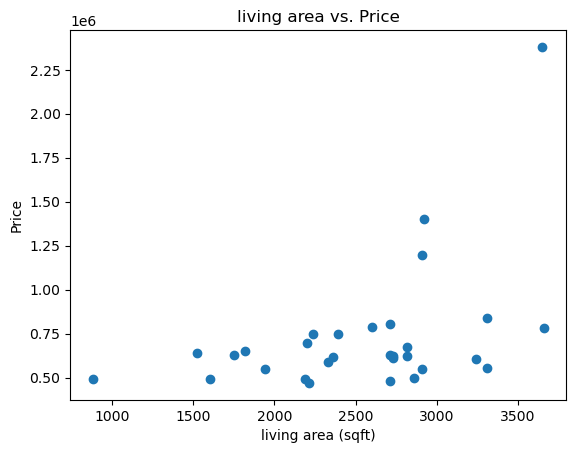

In [6]:
# Scatter plot to visualize the relationship between living area and price
plt.scatter(df['living area'], df['Price'])
plt.xlabel('living area (sqft)')
plt.ylabel('Price')
plt.title('living area vs. Price')

DISTRIBUTION OF PRICE FOR EACH OF BEDROOM USING BOX PLOT 

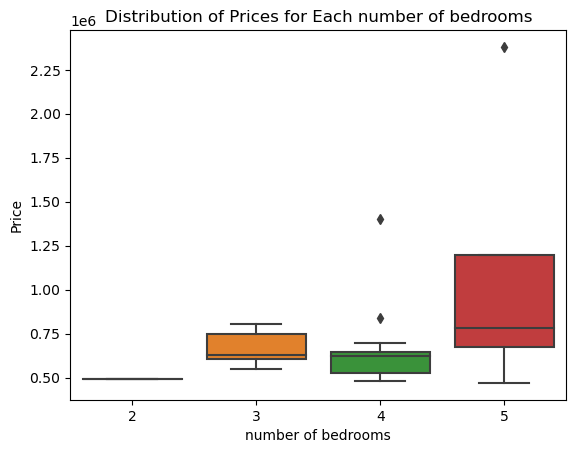

In [7]:
# Box plot to visualize the distribution of prices for each number of bedrooms
sns.boxplot(x='number of bedrooms', y='Price', data=df)
plt.xlabel('number of bedrooms')
plt.ylabel('Price')
plt.title('Distribution of Prices for Each number of bedrooms')

plt.show()



PRICE DISTRIBUTION USING HISTOGRAM

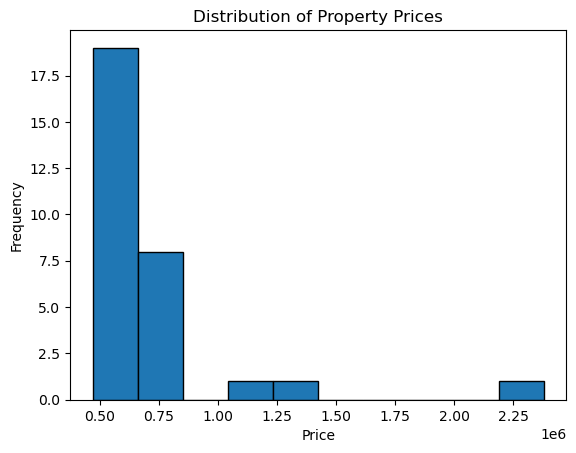

In [8]:
plt.hist(df['Price'], bins=10, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Property Prices')
plt.show()

DISTRIBUTION OF NUMBER OF BEDROOM USING COUNT PLOT

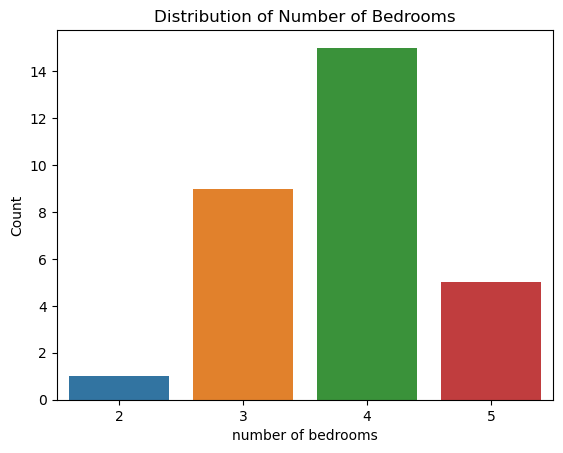

In [9]:
sns.countplot(x='number of bedrooms', data=df)
plt.xlabel('number of bedrooms')
plt.ylabel('Count')
plt.title('Distribution of Number of Bedrooms')
plt.show()

AVERAGE PRICE BY NUMBER OF BEDROOM USING BAR PLOT

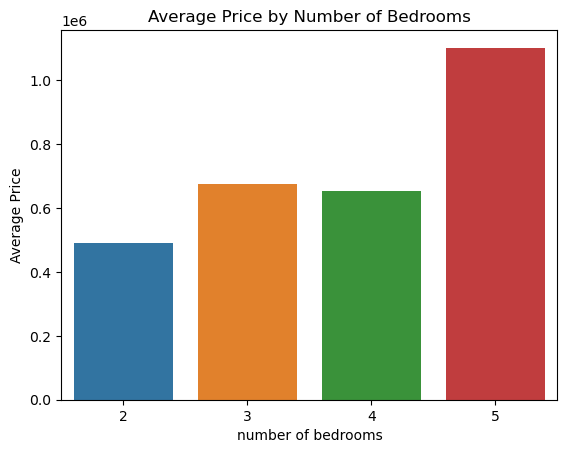

In [10]:
average_price_by_bedrooms = df.groupby('number of bedrooms')['Price'].mean().reset_index()
sns.barplot(x='number of bedrooms', y='Price', data=average_price_by_bedrooms)
plt.xlabel('number of bedrooms')
plt.ylabel('Average Price')
plt.title('Average Price by Number of Bedrooms')
plt.show()

PRICE V/S LIVING AREA BY BEDROOM COUNT USING SCATTER POLT

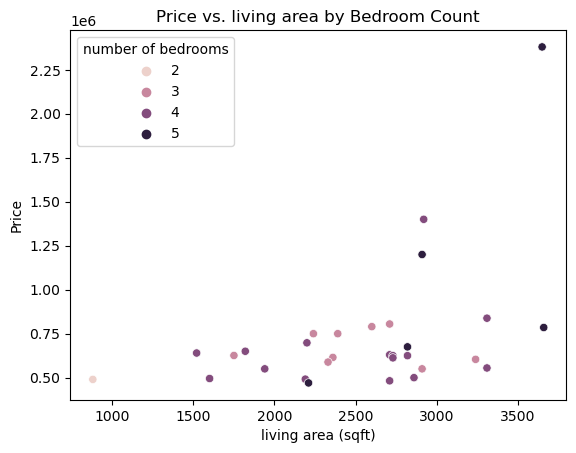

In [11]:
sns.scatterplot(x='living area', y='Price', hue='number of bedrooms', data=df)
plt.xlabel('living area (sqft)')
plt.ylabel('Price')
plt.title('Price vs. living area by Bedroom Count')
plt.legend(title='number of bedrooms')
plt.show()

POTENTIAL OUTLIERS IN THE PRICE COLUMN USING BOX PLOT

C:\Users\sahil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


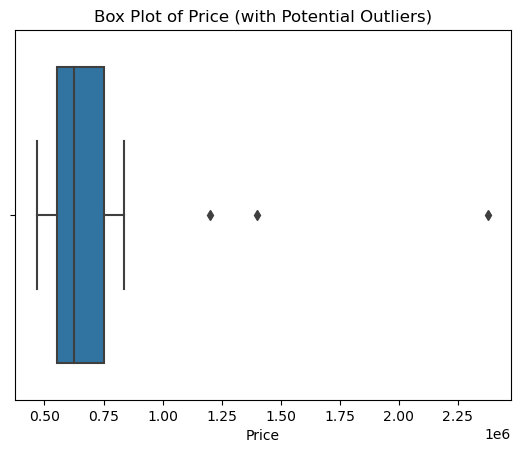

In [12]:
sns.boxplot(df['Price'])
plt.xlabel('Price')
plt.title('Box Plot of Price (with Potential Outliers)')
plt.show()

PROPERTY PRICE QUARTILES

In [13]:
price_quartiles = df['Price'].quantile([0.25, 0.5, 0.75]).values

print("25th Percentile: ", price_quartiles[0])
print("50th Percentile (Median): ", price_quartiles[1])
print("75th Percentile: ", price_quartiles[2])


25th Percentile:  551250.0
50th Percentile (Median):  625500.0
75th Percentile:  750000.0


PRICE DISTRIBUTION ,
BEDROOM COUNT DISTRIBUTION ,
AVERAGE PRICE BY BEDROOM COUNT USING SUBPOLT

PRICE V/S AREA BY BEDROOM COUNT USING SCATTER PLOT

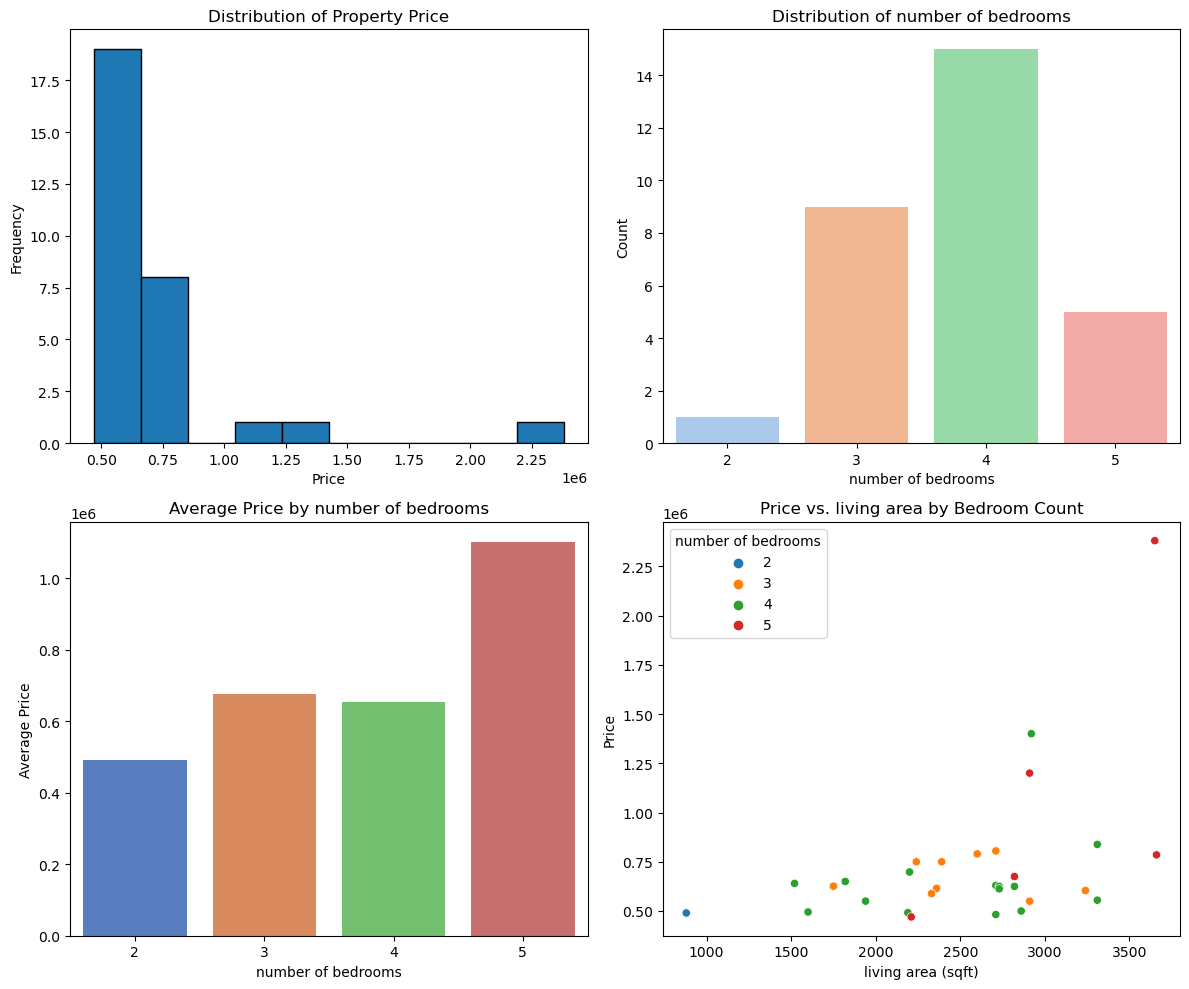

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Subplot 1: Price Distribution
axs[0, 0].hist(df['Price'], bins=10, edgecolor='black')
axs[0, 0].set_xlabel('Price')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('Distribution of Property Price')

# Subplot 2: Bedroom Count Distribution
sns.countplot(x='number of bedrooms', data=df, ax=axs[0, 1], palette='pastel')
axs[0, 1].set_xlabel('number of bedrooms')
axs[0, 1].set_ylabel('Count')
axs[0, 1].set_title('Distribution of number of bedrooms')

# Subplot 3: Average Price by Bedroom Count
average_price_by_bedrooms = df.groupby('number of bedrooms')['Price'].mean().reset_index()
sns.barplot(x='number of bedrooms', y='Price', data=average_price_by_bedrooms, ax=axs[1, 0], palette='muted')
axs[1, 0].set_xlabel('number of bedrooms')
axs[1, 0].set_ylabel('Average Price')
axs[1, 0].set_title('Average Price by number of bedrooms')

# Subplot 4: Price vs. Living Area by Bedroom Count (Scatter Plot)
scatter_plot = sns.scatterplot(x='living area', y='Price', hue='number of bedrooms', data=df, ax=axs[1, 1], palette='tab10')
axs[1, 1].set_xlabel('living area (sqft)')
axs[1, 1].set_ylabel('Price')
axs[1, 1].set_title('Price vs. living area by Bedroom Count')
scatter_plot.legend(title='number of bedrooms')

plt.tight_layout()
plt.show()

CORRELATION MATRIX USING HEATMAP

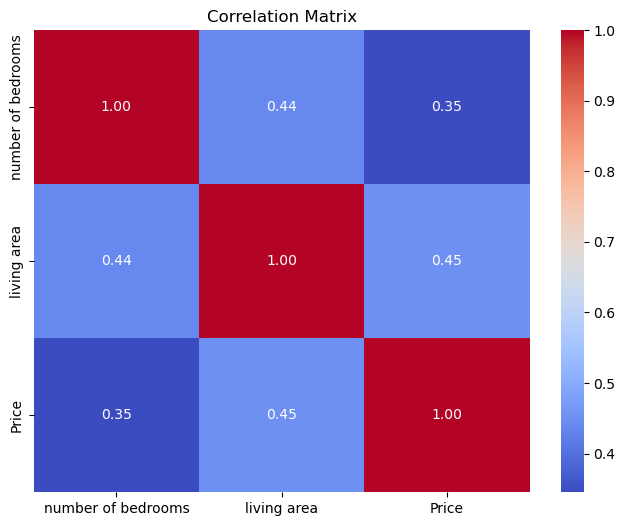

In [15]:
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


FUTURE IMPORTANCE USING RANDOM FOREST

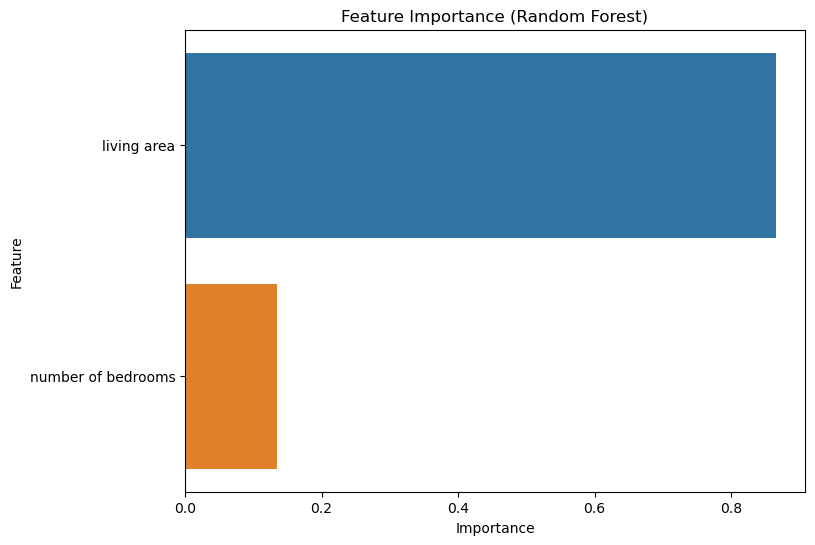

In [16]:
from sklearn.ensemble import RandomForestRegressor


X = df.drop('Price', axis=1)
y = df['Price']


rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X, y)
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


REGRESSION LINE (PROPERTY PRICE V/S LIVING AREA)

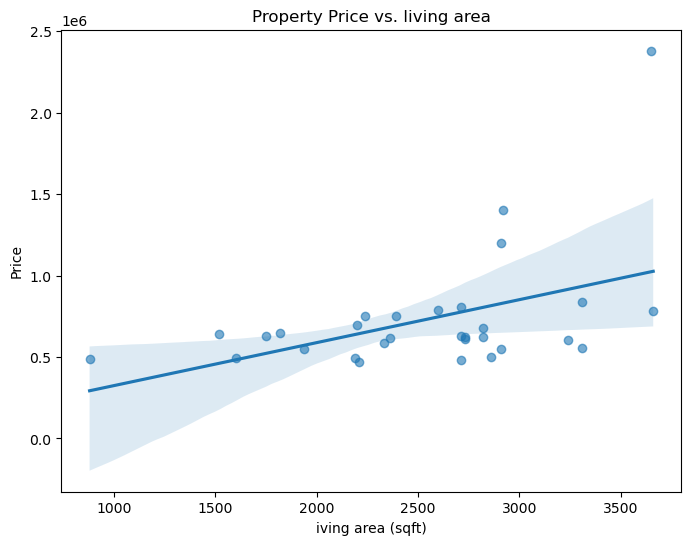

In [17]:
plt.figure(figsize=(8, 6))
sns.regplot(x='living area', y='Price', data=df, scatter_kws={'alpha':0.6})
plt.xlabel('iving area (sqft)')
plt.ylabel('Price')
plt.title('Property Price vs. living area')
plt.show()

SEPARATE THE DATA SET (X) IS INDEPENDENT AND (Y) IS TARGET VARIABLE

In [18]:
X = df[['living area']]
Y = df['Price']

LINEAR REGRESSION MODEL

In [19]:
# Create a linear regression model
model = LinearRegression()
model.fit(X, Y)


LinearRegression()

 PREDICTION MODEL

In [20]:
# Make predictions on the entire dataset
Y_pred = model.predict(X)
df['Predicted_Price'] = Y_pred


CALCULATION OF MEAN SQUARED ERROR 

In [21]:
mse = mean_squared_error(Y, Y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 105757274557.66768


VISUALIZE ACTUAL PRICE V/S PREDICTED PRICES USING SCATTER PLOT

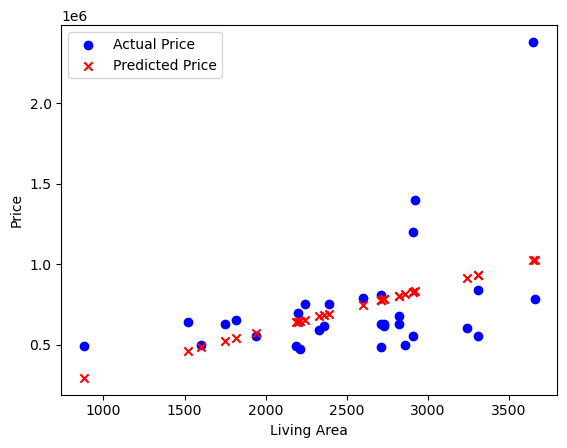

In [30]:
plt.scatter(df['living area'], df['Price'], label='Actual Price' , color = 'blue')
plt.scatter(df['living area'], df['Predicted_Price'], label='Predicted Price', color = 'red' , marker='x')
plt.xlabel('Living Area')
plt.ylabel('Price')
plt.legend()
plt.show()

CONCLUSION 

In [23]:
# Conclusion
print("\n-------- Model Evaluation Complete --------")
print("Linear Regression Model Summary:")
print("-------------------------------")
print("Mean Squared Error (MSE): {:.2f}".format(mse))


-------- Model Evaluation Complete --------
Linear Regression Model Summary:
-------------------------------
Mean Squared Error (MSE): 105757274557.67
